In [2]:
from pynq import Overlay
from pynq.lib import AxiGPIO

overlay = Overlay('design_2.bit')

#overlay?

dma = overlay.axi_dma_0
multiply = overlay.mult_constant_0
calcola = overlay.calcola_0


Immagine Originale


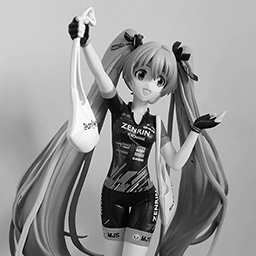

Nuova Immaggine


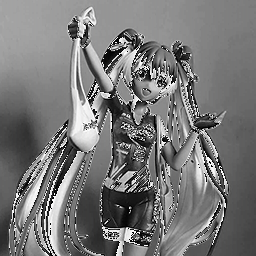

In [3]:
from pynq import allocate
import numpy as np
from PIL import Image
from IPython.display import display

original_image = Image.open("4.bmp")
pic_width, pic_height = original_image.size

print("Immagine Originale")
display(original_image)
img_stream=np.asarray(original_image)

in_buffer = allocate(shape=(pic_height, pic_width,3), dtype=np.uint8,cacheable=True)
out_buffer = allocate(shape=(pic_height, pic_width,3), dtype=np.uint8,cacheable=True)

np.copyto(in_buffer,img_stream)

#costante filtro
multiply.write(0x10,2)

dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)

dma.sendchannel.wait()
dma.recvchannel.wait()
#nuova immagine
new_image=Image.fromarray(out_buffer)
print("Nuova Immaggine")


display(new_image)



In [4]:
#calcola overlay (ALU)
operazione = bytearray('*', 'UTF-8')
numero1=1550
numero2=12

calcola.write(0x10,numero1)
calcola.write(0x18,numero2)
calcola.write(0x20,operazione[0])
risultato=calcola.read(0x28)
print("(",numero1,operazione.decode(),numero2,") =",risultato)


( 1550 * 12 ) = 18600


In [5]:
#fine processo

from time import sleep 
from pynq.overlays.base import BaseOverlay


base = BaseOverlay ("base.bit")

base.rgbleds[4].write(1)
base.rgbleds[5].write(4)
sleep(2)
base.rgbleds[4].off()
base.rgbleds[5].off()

